In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pickle 
from scipy.stats import pearsonr, chi2_contingency
with open('data_with_coord_29_04_21', "rb") as fh:
    df = pickle.load(fh)

In [2]:
import numpy as np

In [3]:
pd.set_option('display.max_columns', 23)
# On retire les données dont l'incident est à plus de 150 km de Londre
df = df[df.dist_euclidian<150000]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797003 entries, 0 to 1797003
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   IncidentNumber            object 
 1   TimeMobilised             object 
 2   TimeMobile                object 
 3   TimeArrived               object 
 4   AttendanceTimeSeconds     float64
 5   DeployedFromStation_Name  object 
 6   DelayCodeID               float64
 7   DelayCode_Description     object 
 8   IncidentGroup             object 
 9   DateOfCall                object 
 10  CalYear                   int64  
 11  TimeOfCall                object 
 12  HourOfCall                int64  
 13  Easting_rounded           int64  
 14  Northing_rounded          int64  
 15  color                     object 
 16  d_long                    float64
 17  d_lat                     float64
 18  x_utm                     float64
 19  y_utm                     float64
 20  o_long                  

In [5]:
df.isnull().sum()

IncidentNumber              0
TimeMobilised               0
TimeMobile                  0
TimeArrived                 0
AttendanceTimeSeconds       0
DeployedFromStation_Name    0
DelayCodeID                 0
DelayCode_Description       0
IncidentGroup               0
DateOfCall                  0
CalYear                     0
TimeOfCall                  0
HourOfCall                  0
Easting_rounded             0
Northing_rounded            0
color                       0
d_long                      0
d_lat                       0
x_utm                       0
y_utm                       0
o_long                      0
o_lat                       0
o_x_utm                     0
o_y_utm                     0
dist_euclidian              0
dtype: int64

In [6]:
df.describe()

,AttendanceTimeSeconds,DelayCodeID,CalYear,HourOfCall,Easting_rounded,Northing_rounded,d_long,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian
count,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06,1.797003e+06
mean,4.011574e+02,2.773378e+00,2.014444e+03,1.351363e+01,5.305245e+05,1.805104e+05,-1.205793e-01,5.150837e+01,-1.342283e+04,6.711725e+06,-1.204801e-01,5.150825e+01,-1.341179e+04,6.711702e+06,3.029837e+03
std,5.360889e+02,4.862935e+00,3.566042e+00,6.300112e+00,9.834912e+03,7.422533e+03,1.418392e-01,6.660432e-02,1.578947e+04,1.191031e+04,1.396091e-01,6.507531e-02,1.554121e+04,1.163703e+04,2.431196e+03
min,1.000000e+00,0.000000e+00,2.009000e+03,0.000000e+00,4.598500e+05,1.457500e+05,-1.141720e+00,5.119234e+01,-1.270957e+05,6.655387e+06,-4.586300e-01,5.131373e+01,-5.105446e+04,6.676978e+06,8.631572e+00
25%,2.560000e+02,0.000000e+00,2.011000e+03,9.000000e+00,5.250500e+05,1.760500e+05,-1.995797e-01,5.146907e+01,-2.221711e+04,6.704691e+06,-2.013300e-01,5.146746e+01,-2.241195e+04,6.704403e+06,1.582225e+03
50%,3.330000e+02,0.000000e+00,2.014000e+03,1.400000e+01,5.307500e+05,1.810500e+05,-1.168314e-01,5.151381e+01,-1.300561e+04,6.712688e+06,-1.215590e-01,5.151249e+01,-1.353189e+04,6.712453e+06,2.570357e+03
75%,4.350000e+02,5.000000e+00,2.018000e+03,1.900000e+01,5.362500e+05,1.853500e+05,-3.765835e-02,5.155157e+01,-4.192108e+03,6.719447e+06,-4.318400e-02,5.155296e+01,-4.807221e+03,6.719694e+06,3.872109e+03
max,1.194990e+05,1.800000e+01,2.021000e+03,2.300000e+01,5.948500e+05,2.345500e+05,8.099769e-01,5.200504e+01,9.016621e+04,6.801036e+06,2.329000e-01,5.166028e+01,2.592631e+04,6.738931e+06,1.093304e+05


In [7]:
df.head()

,IncidentNumber,TimeMobilised,TimeMobile,TimeArrived,AttendanceTimeSeconds,DeployedFromStation_Name,DelayCodeID,DelayCode_Description,IncidentGroup,DateOfCall,CalYear,...,Northing_rounded,color,d_long,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian
0,235138081,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,342.0,Clapham,0.0,RAS,Special Service,01-janv-09,2009,...,176850,blue,-0.148916,51.475992,-16577.246612,6.705927e+06,-0.141051,51.465400,-15701.725496,6.704034e+06,2085.533280
1,2091,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,308.0,Edmonton,0.0,RAS,Fire,01-janv-09,2009,...,194450,red,-0.068836,51.632970,-7662.804053,6.734032e+06,-0.069120,51.627217,-7694.403204,6.733000e+06,1032.257024
2,3091,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,210.0,Hillingdon,0.0,RAS,Fire,01-janv-09,2009,...,182850,red,-0.447902,51.534284,-49860.215886,6.716352e+06,-0.451701,51.531257,-50283.125311,6.715810e+06,687.205480
3,5091,01/01/2009 00:06:04,01/01/2009 00:08:26,01/01/2009 00:10:14,250.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,...,185350,red,-0.111220,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548
4,5091,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,233.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,...,185350,red,-0.111220,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548


In [8]:
df.tail()

,IncidentNumber,TimeMobilised,TimeMobile,TimeArrived,AttendanceTimeSeconds,DeployedFromStation_Name,DelayCodeID,DelayCode_Description,IncidentGroup,DateOfCall,CalYear,...,Northing_rounded,color,d_long,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian
1796999,011886-31012021,31/01/2021 23:47,31/01/2021 23:51,31/01/2021 23:51,266.0,Dockhead,0.0,RAS,False Alarm,31/01/2021,2021,...,180150,cyan,-0.092993,51.504772,-10351.967916,6.711072e+06,-0.071144,51.500708,-7919.713853,6.710346e+06,2538.510729
1797000,011887-31012021,31/01/2021 23:47,31/01/2021 23:49,31/01/2021 23:50,174.0,Deptford,0.0,RAS,False Alarm,31/01/2021,2021,...,178450,cyan,-0.036052,51.488544,-4013.338149,6.708171e+06,-0.034350,51.485205,-3823.824509,6.707574e+06,626.269213
1797001,011887-31012021,31/01/2021 23:47,31/01/2021 23:48,31/01/2021 23:53,336.0,Greenwich,0.0,RAS,False Alarm,31/01/2021,2021,...,178450,cyan,-0.036052,51.488544,-4013.338149,6.708171e+06,-0.012700,51.474642,-1413.757533,6.705686e+06,3596.236942
1797002,011887-31012021,31/01/2021 23:47,31/01/2021 23:49,31/01/2021 23:53,342.0,New Cross,0.0,RAS,False Alarm,31/01/2021,2021,...,178450,cyan,-0.036052,51.488544,-4013.338149,6.708171e+06,-0.047339,51.473858,-5269.753375,6.705546e+06,2910.273178
1797003,011887-31012021,31/01/2021 23:47,31/01/2021 23:49,31/01/2021 23:53,346.0,Old Kent Road,0.0,RAS,False Alarm,31/01/2021,2021,...,178450,cyan,-0.036052,51.488544,-4013.338149,6.708171e+06,-0.074664,51.486999,-8311.558461,6.707895e+06,4307.085191


In [9]:
df['DeployedFromStation_Name'].unique()

array(['Clapham', 'Edmonton', 'Hillingdon', 'Holloway', 'Kentish Town',
       'East Greenwich', 'Heston', 'Euston', 'Enfield', 'Southgate',
       'Feltham', 'Dowgate', 'Beckenham', 'Mitcham', 'North Kensington',
       'Paddington', 'Finchley', 'Soho', 'Plumstead', 'Plaistow',
       'East Ham', 'Old Kent Road', 'Brixton', 'Tooting', 'Hainault',
       'Poplar', 'West Norwood', 'Leyton', 'Walthamstow', 'Greenwich',
       'Islington', 'Croydon', 'Norbury', 'Kingston', 'Barnet',
       'Willesden', 'Chelsea', 'Homerton', 'Deptford', 'Hornsey',
       'Bexley', 'New Malden', 'West Hampstead', 'Lee Green', 'Eltham',
       'Sidcup', 'Dagenham', 'Stratford', 'Bethnal Green', 'Addington',
       'Hendon', 'Ilford', 'Hayes', 'Wembley', 'Stanmore', 'Kensington',
       'Battersea', 'Chiswick', 'Wandsworth', 'Stoke Newington', 'Purley',
       'Twickenham', 'Tottenham', 'Hammersmith', 'Barking', 'Chingford',
       'Orpington', 'Erith', 'Lambeth', 'New Cross', 'Romford', 'Ruislip',
       'S

In [10]:
df['DeployedFromStation_Name'].unique().shape

(102,)

In [11]:
df['IncidentGroup'].unique()

array(['Special Service', 'Fire', 'False Alarm'], dtype=object)

# Essayons de voir la distribution des distances euclidiennes d'intervention:

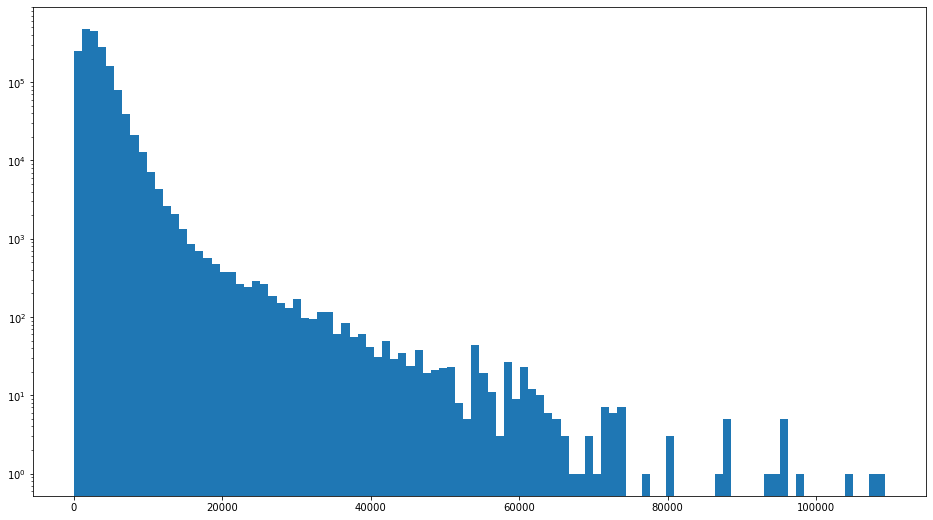

In [12]:
plt.figure(figsize = (16,9))
plt.hist(df['dist_euclidian'], bins = 100)
plt.yscale(value = 'log');

# Nouc constatons une très forte variabilité dans les distances.

# Maintenant, visualisons la distance euclidienne moyenne parcourue à chaque intervention, par caserne:

In [13]:
dists = df.groupby('DeployedFromStation_Name').agg({'dist_euclidian':'mean'}).reset_index()

In [14]:
dists['z_score'] = (dists.dist_euclidian - dists.dist_euclidian.mean())/dists.dist_euclidian.std()
def color(d):
    if np.abs(d.z_score)>1.96: return 'red'
    else: return 'blue'
dists['color'] = dists.apply(color, axis=1)
dists

,DeployedFromStation_Name,dist_euclidian,z_score,color
0,Acton,2951.827877,-0.359990,blue
1,Addington,3677.263034,0.520706,blue
2,Barking,3630.043244,0.463380,blue
3,Barnet,3615.444921,0.445657,blue
4,Battersea,2431.343075,-0.991872,blue
...,...,...,...,...
97,Whitechapel,2034.758737,-1.473335,blue
98,Willesden,2975.206372,-0.331608,blue
99,Wimbledon,3171.960291,-0.092744,blue
100,Woodford,3847.881989,0.727841,blue


### Version PyDeck

In [15]:
import pydeck as pdk
centers = []

dat = pd.DataFrame(columns=['x','y','lon','lat','DeployedFromStation_Name'])
for j, i in enumerate(df.DeployedFromStation_Name.unique()):
    sub = df[df.DeployedFromStation_Name==i].iloc[0, :]
    # pour chaque station, on récupère les coordonnées x y, lon, lat ainsi que le nom
    x, y, lon, lat, i = sub.o_x_utm, \
                        sub.o_y_utm, \
                        sub.o_long, \
                        sub.o_lat, \
                        i
                        
    dat.loc[j] = [x, y, lon, lat, i]

dat = dat.merge(dists, on='DeployedFromStation_Name')
dat


,x,y,lon,lat,DeployedFromStation_Name,dist_euclidian,z_score,color
0,-15701.725496,6.704034e+06,-0.141051,51.465400,Clapham,2500.068496,-0.908437,blue
1,-7694.403204,6.733000e+06,-0.069120,51.627217,Edmonton,3382.517777,0.162878,blue
2,-50283.125311,6.715810e+06,-0.451701,51.531257,Hillingdon,4315.868582,1.295988,blue
3,-12964.379217,6.721272e+06,-0.116461,51.561766,Holloway,2401.913013,-1.027600,blue
4,-15813.267626,6.719694e+06,-0.142053,51.552957,Kentish Town,2493.098114,-0.916899,blue
...,...,...,...,...,...,...,...,...
97,-1472.311585,6.702573e+06,-0.013226,51.457223,Lewisham,2549.575468,-0.848335,blue
98,-6214.744532,6.712163e+06,-0.055828,51.510868,Shadwell,2190.004930,-1.284862,blue
99,24538.377995,6.711323e+06,0.220432,51.506171,Wennington,5487.535678,2.718421,red
100,3768.164763,6.676978e+06,0.033850,51.313730,Biggin Hill,5423.586570,2.640785,red


In [16]:
dat['rounded'] = dat.dist_euclidian/100
dat['ratio'] = dat.dist_euclidian/dat.dist_euclidian.max()
dat.dist_euclidian = dat.dist_euclidian.round(2)
convert = pd.DataFrame(columns=dat.columns)
for i in range(dat.shape[0]):
    convert = convert.append([dat.loc[i] for j in range(int(dat.loc[i].rounded))])
print(convert.shape)
layer = pdk.Layer(
    "ColumnLayer",
    dat,
    get_position=['lon', 'lat'],
    auto_highlight=True,
    get_elevation='rounded',
    elevation_scale=100,
    pickable=True,
    extruded=True,
    radius=1500,
    get_fill_color='[220+(240-220)*(1-ratio), 20+(230-20)*(1-ratio), 60+(140-60)*(1-ratio)]',
    coverage=0.3)
view_state = pdk.ViewState(
    longitude=-0.118092,
    latitude=51.509865,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)
tooltip={
        'html': "<b>{DeployedFromStation_Name}</b> <br> distance moyenne des interventions <b>{dist_euclidian} m</b>",
        'style': {
            'color': 'white',
            "z-index": 2
            }
        }
r = pdk.Deck(map_style="light",layers=[layer], initial_view_state=view_state, tooltip=tooltip)
r.to_html('hexagon-example.html')

(3266, 10)


# D'après les stats descriptives, la distance euclidienne moyenne en globalité est de 3514 mètres. Or, d'après les graphiques ci-dessus, nous remarquons clairement que certaines casernes se démarquent fortement de la moyenne, de plus de 2 fois l'écart-type, notamment "Plumstead", "Leyton" et "Feltham", qui sont toutes les trois très excentrés par rapport au centre-ville de Londres.

# Maintenant, visualisons la distance euclidienne cumulée parcourue par chaque caserne:

In [17]:
dists_bis = df.groupby('DeployedFromStation_Name').agg({'dist_euclidian':'sum'}).reset_index()
dists_bis['z_score'] = (dists_bis.dist_euclidian - dists_bis.dist_euclidian.mean())/dists_bis.dist_euclidian.std()
def color(d):
    if np.abs(d.z_score)>1.96: return 'red'
    else: return 'blue'
dists_bis['color'] = dists_bis.apply(color, axis=1)
dists_bis

,DeployedFromStation_Name,dist_euclidian,z_score,color
0,Acton,4.442796e+07,-0.445547,blue
1,Addington,3.591951e+07,-0.869078,blue
2,Barking,7.145740e+07,0.899917,blue
3,Barnet,3.140375e+07,-1.093862,blue
4,Battersea,3.165122e+07,-1.081543,blue
...,...,...,...,...
97,Whitechapel,4.522048e+07,-0.406097,blue
98,Willesden,5.020363e+07,-0.158047,blue
99,Wimbledon,4.111812e+07,-0.610303,blue
100,Woodford,3.610468e+07,-0.859861,blue


In [18]:
import pydeck as pdk
dat = pd.DataFrame(columns=['x','y','lon','lat','DeployedFromStation_Name'])
for j, i in enumerate(df.DeployedFromStation_Name.unique()):
    sub = df[df.DeployedFromStation_Name==i].iloc[0, :]
    # pour chaque station, on récupère les coordonnées x y, lon, lat ainsi que le nom
    x, y, lon, lat, i = sub.o_x_utm, \
                        sub.o_y_utm, \
                        sub.o_long, \
                        sub.o_lat, \
                        i
                        
    dat.loc[j] = [x, y, lon, lat, i]

dat = dat.merge(dists_bis, on='DeployedFromStation_Name')
dat


,x,y,lon,lat,DeployedFromStation_Name,dist_euclidian,z_score,color
0,-15701.725496,6.704034e+06,-0.141051,51.465400,Clapham,4.659378e+07,-0.337737,blue
1,-7694.403204,6.733000e+06,-0.069120,51.627217,Edmonton,7.562633e+07,1.107437,blue
2,-50283.125311,6.715810e+06,-0.451701,51.531257,Hillingdon,8.094412e+07,1.372144,blue
3,-12964.379217,6.721272e+06,-0.116461,51.561766,Holloway,5.125202e+07,-0.105860,blue
4,-15813.267626,6.719694e+06,-0.142053,51.552957,Kentish Town,7.938274e+07,1.294423,blue
...,...,...,...,...,...,...,...,...
97,-1472.311585,6.702573e+06,-0.013226,51.457223,Lewisham,3.872295e+07,-0.729529,blue
98,-6214.744532,6.712163e+06,-0.055828,51.510868,Shadwell,2.401121e+07,-1.461846,blue
99,24538.377995,6.711323e+06,0.220432,51.506171,Wennington,2.196112e+07,-1.563895,blue
100,3768.164763,6.676978e+06,0.033850,51.313730,Biggin Hill,1.156309e+07,-2.081485,red


In [19]:
dat['rounded'] = (dat.dist_euclidian/1000000).round(2)
dat['ratio'] = dat.dist_euclidian/dat.dist_euclidian.max()
dat.dist_euclidian = dat.dist_euclidian.round(2)
convert = pd.DataFrame(columns=dat.columns)
for i in range(dat.shape[0]):
    convert = convert.append([dat.loc[i] for j in range(int(dat.loc[i].rounded))])
print(convert.shape)
layer = pdk.Layer(
    "ColumnLayer",
    dat,
    get_position=['lon', 'lat'],
    auto_highlight=True,
    get_elevation='rounded',
    elevation_scale=20,
    pickable=True,
    extruded=True,
    radius=1500,
    get_fill_color='[220+(240-220)*(1-ratio), 20+(230-20)*(1-ratio), 60+(140-60)*(1-ratio)]',
    coverage=0.3)
view_state = pdk.ViewState(
    longitude=-0.118092,
    latitude=51.509865,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)
tooltip={
        'html': "<b>{DeployedFromStation_Name}</b> <br> distance cumulée des interventions <b>{rounded} x1000Km</b>",
        'style': {
            'color': 'white',
            "z-index": 2
            }
        }
r = pdk.Deck(map_style="light",layers=[layer], initial_view_state=view_state, tooltip=tooltip)
r.to_html('hexagon-example2.html')

(5395, 10)


# Encore une fois, les trois stations citées précédemment, qui sont situées loin du centre-ville de Londres, totalisent le plus de 'kilomètres' cumulés.

# Visualisons la distance euclidienne moyenne parcourue par intervention, pour une année civile donnée:

In [20]:
tmean_per_year = df.groupby('CalYear').agg({'dist_euclidian':'mean'})
tstd_per_year = df.groupby('CalYear').agg({'dist_euclidian':'std'})

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


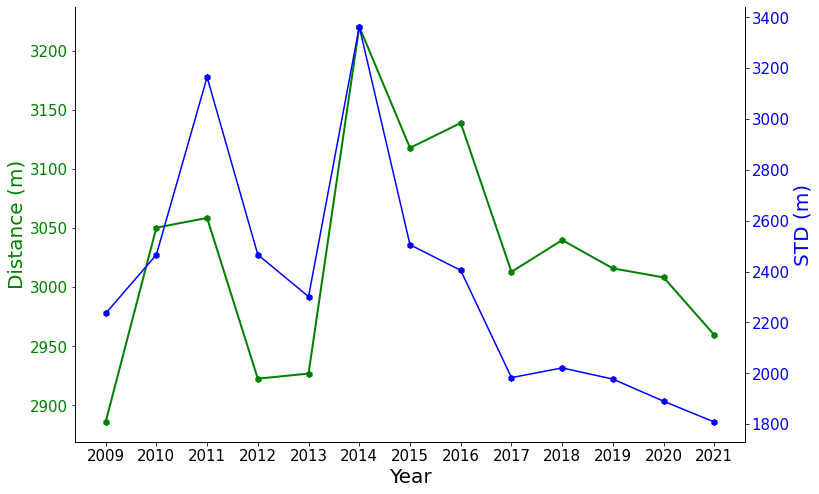

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
#plt.grid(True)
ax.plot( np.arange(2009,2022,1), tmean_per_year.dist_euclidian, "g-h", linewidth=2)
#ax.fill_between( np.arange(0,24,1), tmean_per_h.AttendanceTimeSeconds - tstd_per_h.AttendanceTimeSeconds, 
#                 tmean_per_h.AttendanceTimeSeconds + tstd_per_h.AttendanceTimeSeconds, alpha = 0.2, color = 'green')
ax.set_xticks(np.arange(2009,2022,1))
ax.set_xlabel('Year',fontsize = 20)
ax.set_ylabel("Distance (m)", fontsize = 20, color='green')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('STD (m)', color='blue', fontsize=20)  # we already handled the x-label with ax1
ax2.plot(np.arange(2009,2022,1), tstd_per_year.dist_euclidian, "b-h")
ax2.tick_params(axis='y', labelcolor=color)

def format_ax(axs):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=15)
    #axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

format_ax(ax)
format_ax(ax2)
plt.savefig('dist_year_line.png', dpi=300)

In [22]:
print(pearsonr(tmean_per_year.dist_euclidian, tstd_per_year.dist_euclidian))
print("Il y a une relation significative (P<.05) entre la STD et la moyenne des distances des intervention par années")
print("La STD est très fortement et positivement corrélée à la moyenne, mais toutes deux chutent fortement en 2017 et deviennent stables : les données précédent 2016 ne seraient donc pas représentatives des délai d'intervention de nos jours")

(0.5736325335720119, 0.04038781275446026)
Il y a une relation significative (P<.05) entre la STD et la moyenne des distances des intervention par années
La STD est très fortement et positivement corrélée à la moyenne, mais toutes deux chutent fortement en 2017 et deviennent stables : les données précédent 2016 ne seraient donc pas représentatives des délai d'intervention de nos jours


# Nous remarquons qu'il y'a une rupture en 2016, à la fin de la réforme.

# Voyons maintenant la distance euclidienne moyenne parcourue par heure d'intervention: 

In [23]:
tmean_per_h = df.groupby('HourOfCall').agg({'dist_euclidian':'mean'})
tstd_per_h = df.groupby('HourOfCall').agg({'dist_euclidian':'std'})

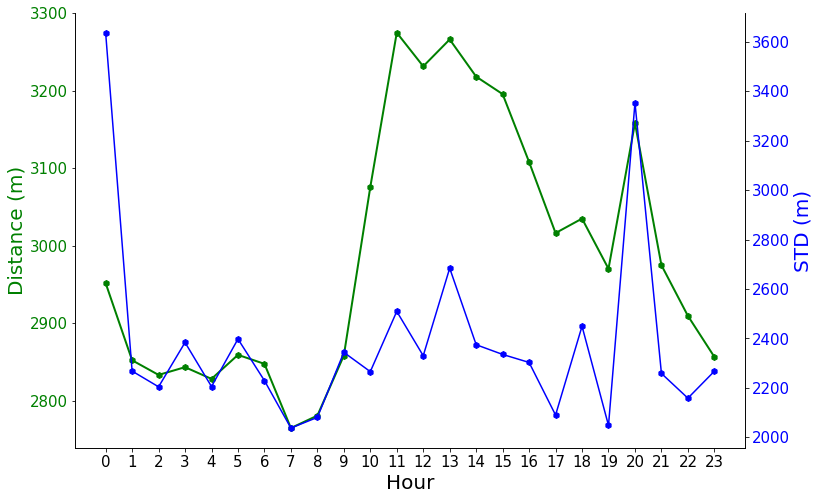

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
#plt.grid(True)
ax.plot( np.arange(0,24,1), tmean_per_h.dist_euclidian, "g-h", linewidth=2)
ax.set_xticks(np.arange(0,24,1))
ax.set_xlabel('Hour',fontsize = 20)
ax.set_ylabel("Distance (m)", fontsize = 20, color='green')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_ylabel('STD (m)', color='blue', fontsize=20)  # we already handled the x-label with ax1
ax2.plot(np.arange(0,24,1), tstd_per_h.dist_euclidian, "b-h")
ax2.tick_params(axis='y', labelcolor=color)

def format_ax(axs):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=15)
    #axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

format_ax(ax)
format_ax(ax2)
plt.savefig('dist_hour_line.png', dpi=300)

In [25]:
print(pearsonr(tmean_per_h.dist_euclidian, tstd_per_h.dist_euclidian))
print("Il y a une relation significative (P<.05) entre la STD et la moyenne des distances des intervention par heure")
print("La STD est moyennement et positivement corrélée à la moyenne, et elle est très importante, ce qui laisse à penser qu'il y a une très grande variabilité dans les interventions")

(0.32671258376348106, 0.11917874915101344)
Il y a une relation significative (P<.05) entre la STD et la moyenne des distances des intervention par heure
La STD est moyennement et positivement corrélée à la moyenne, et elle est très importante, ce qui laisse à penser qu'il y a une très grande variabilité dans les interventions


# La tendance n'est pas très claire, cependant on remarque que les horaires du midi et de l'après-midi concentrent les distances moyennes les plus élevées. Affinons le résultat en affichant les distances cumulées selon l'horaire d'intervention:

In [26]:
t_bis = df.groupby('HourOfCall').agg({'dist_euclidian':'sum'}).reset_index()

In [27]:
t_bis.columns

Index(['HourOfCall', 'dist_euclidian'], dtype='object')

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


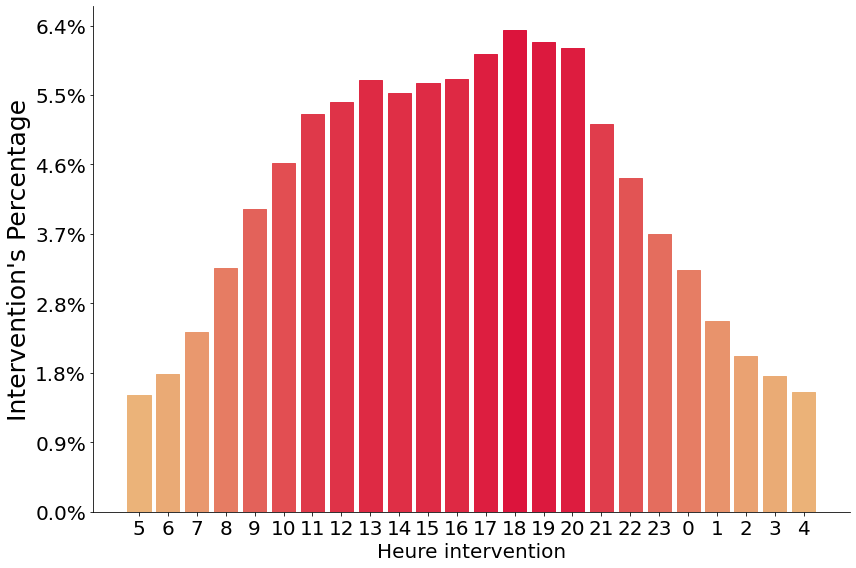

In [28]:
def fill_color(x):
    return np.array([220+(240-220)*(1-x), 20+(230-20)*(1-x), 60+(140-60)*(1-x)])

# We'll color code by height, but you could use any scalar
fracs = t_bis.dist_euclidian / t_bis.dist_euclidian.max()
from matplotlib.ticker import PercentFormatter
print(np.roll(t_bis.HourOfCall, -5))

fig, axs = plt.subplots(1, 1, figsize = (12,8), tight_layout=True)
bars = axs.bar(t_bis.HourOfCall, np.roll(t_bis.dist_euclidian, -5))
axs.set_xticks(t_bis.HourOfCall)
axs.set_xticklabels(np.roll(t_bis.HourOfCall, -5))
axs.set_xlabel('Heure intervention', fontsize =20)

for thisfrac, thispatch in zip(np.roll(fracs, -5), bars):
    color = fill_color(thisfrac)/255
    thispatch.set_color(color)


axs.yaxis.set_major_formatter(PercentFormatter(xmax=t_bis.dist_euclidian.sum()))
axs.set_ylabel("Intervention's Percentage", fontsize=25)
def format_ax(ax):
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    axs.tick_params(axis='both', which='major', labelsize=20)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
format_ax(axs)
plt.savefig('hours_hist.png', dpi=300)

# Une nette tendance se détache: globalement, les horaires de journée concentrent le cumul de distance le plus important.

# Calculons maintenant la distance entre chaque point d'incident le centre de Londres, afin de voir via une matrice de corrélation s'il y'a une relation entre cette distance et le cumul de la distance totale parcourue par caserne:

In [29]:
df.head()

,IncidentNumber,TimeMobilised,TimeMobile,TimeArrived,AttendanceTimeSeconds,DeployedFromStation_Name,DelayCodeID,DelayCode_Description,IncidentGroup,DateOfCall,CalYear,...,Northing_rounded,color,d_long,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian
0,235138081,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,342.0,Clapham,0.0,RAS,Special Service,01-janv-09,2009,...,176850,blue,-0.148916,51.475992,-16577.246612,6.705927e+06,-0.141051,51.465400,-15701.725496,6.704034e+06,2085.533280
1,2091,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,308.0,Edmonton,0.0,RAS,Fire,01-janv-09,2009,...,194450,red,-0.068836,51.632970,-7662.804053,6.734032e+06,-0.069120,51.627217,-7694.403204,6.733000e+06,1032.257024
2,3091,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,210.0,Hillingdon,0.0,RAS,Fire,01-janv-09,2009,...,182850,red,-0.447902,51.534284,-49860.215886,6.716352e+06,-0.451701,51.531257,-50283.125311,6.715810e+06,687.205480
3,5091,01/01/2009 00:06:04,01/01/2009 00:08:26,01/01/2009 00:10:14,250.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,...,185350,red,-0.111220,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548
4,5091,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,233.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,...,185350,red,-0.111220,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548


In [30]:
df['c_long'] = -0.094151 
df['c_lat'] = 51.509093

In [31]:
def wgs84_to_web_mercator(df, lon="c_long", lat="c_lat"):

    k = 6378137
    df["c_x_utm"] = df[lon] * (k * np.pi/180.0)
    df["c_y_utm"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

    return df

In [32]:
df = wgs84_to_web_mercator(df)

In [33]:
df.head()

,IncidentNumber,TimeMobilised,TimeMobile,TimeArrived,AttendanceTimeSeconds,DeployedFromStation_Name,DelayCodeID,DelayCode_Description,IncidentGroup,DateOfCall,CalYear,...,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian,c_long,c_lat,c_x_utm,c_y_utm
0,235138081,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,342.0,Clapham,0.0,RAS,Special Service,01-janv-09,2009,...,-16577.246612,6.705927e+06,-0.141051,51.465400,-15701.725496,6.704034e+06,2085.533280,-0.094151,51.509093,-10480.841378,6.711845e+06
1,2091,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,308.0,Edmonton,0.0,RAS,Fire,01-janv-09,2009,...,-7662.804053,6.734032e+06,-0.069120,51.627217,-7694.403204,6.733000e+06,1032.257024,-0.094151,51.509093,-10480.841378,6.711845e+06
2,3091,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,210.0,Hillingdon,0.0,RAS,Fire,01-janv-09,2009,...,-49860.215886,6.716352e+06,-0.451701,51.531257,-50283.125311,6.715810e+06,687.205480,-0.094151,51.509093,-10480.841378,6.711845e+06
3,5091,01/01/2009 00:06:04,01/01/2009 00:08:26,01/01/2009 00:10:14,250.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,...,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548,-0.094151,51.509093,-10480.841378,6.711845e+06
4,5091,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,233.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,...,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548,-0.094151,51.509093,-10480.841378,6.711845e+06


In [34]:
pd.set_option('display.max_columns', 27)

In [35]:
df['dist_center'] = np.sqrt( (df.x_utm - df.c_x_utm)**2 + (df.y_utm - df.c_y_utm)**2)

In [36]:
df.head()

,IncidentNumber,TimeMobilised,TimeMobile,TimeArrived,AttendanceTimeSeconds,DeployedFromStation_Name,DelayCodeID,DelayCode_Description,IncidentGroup,DateOfCall,CalYear,TimeOfCall,HourOfCall,...,d_lat,x_utm,y_utm,o_long,o_lat,o_x_utm,o_y_utm,dist_euclidian,c_long,c_lat,c_x_utm,c_y_utm,dist_center
0,235138081,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,342.0,Clapham,0.0,RAS,Special Service,01-janv-09,2009,00:00:37,0,...,51.475992,-16577.246612,6.705927e+06,-0.141051,51.465400,-15701.725496,6.704034e+06,2085.533280,-0.094151,51.509093,-10480.841378,6.711845e+06,8496.570617
1,2091,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,308.0,Edmonton,0.0,RAS,Fire,01-janv-09,2009,00:03:00,0,...,51.632970,-7662.804053,6.734032e+06,-0.069120,51.627217,-7694.403204,6.733000e+06,1032.257024,-0.094151,51.509093,-10480.841378,6.711845e+06,22364.894046
2,3091,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,210.0,Hillingdon,0.0,RAS,Fire,01-janv-09,2009,00:04:27,0,...,51.534284,-49860.215886,6.716352e+06,-0.451701,51.531257,-50283.125311,6.715810e+06,687.205480,-0.094151,51.509093,-10480.841378,6.711845e+06,39636.431564
3,5091,01/01/2009 00:06:04,01/01/2009 00:08:26,01/01/2009 00:10:14,250.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,00:05:39,0,...,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548,-0.094151,51.509093,-10480.841378,6.711845e+06,7879.768883
4,5091,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,233.0,Holloway,0.0,RAS,Fire,01-janv-09,2009,00:05:39,0,...,51.551829,-12380.899219,6.719493e+06,-0.116461,51.561766,-12964.379217,6.721272e+06,1872.413548,-0.094151,51.509093,-10480.841378,6.711845e+06,7879.768883


In [37]:
import seaborn as sns 

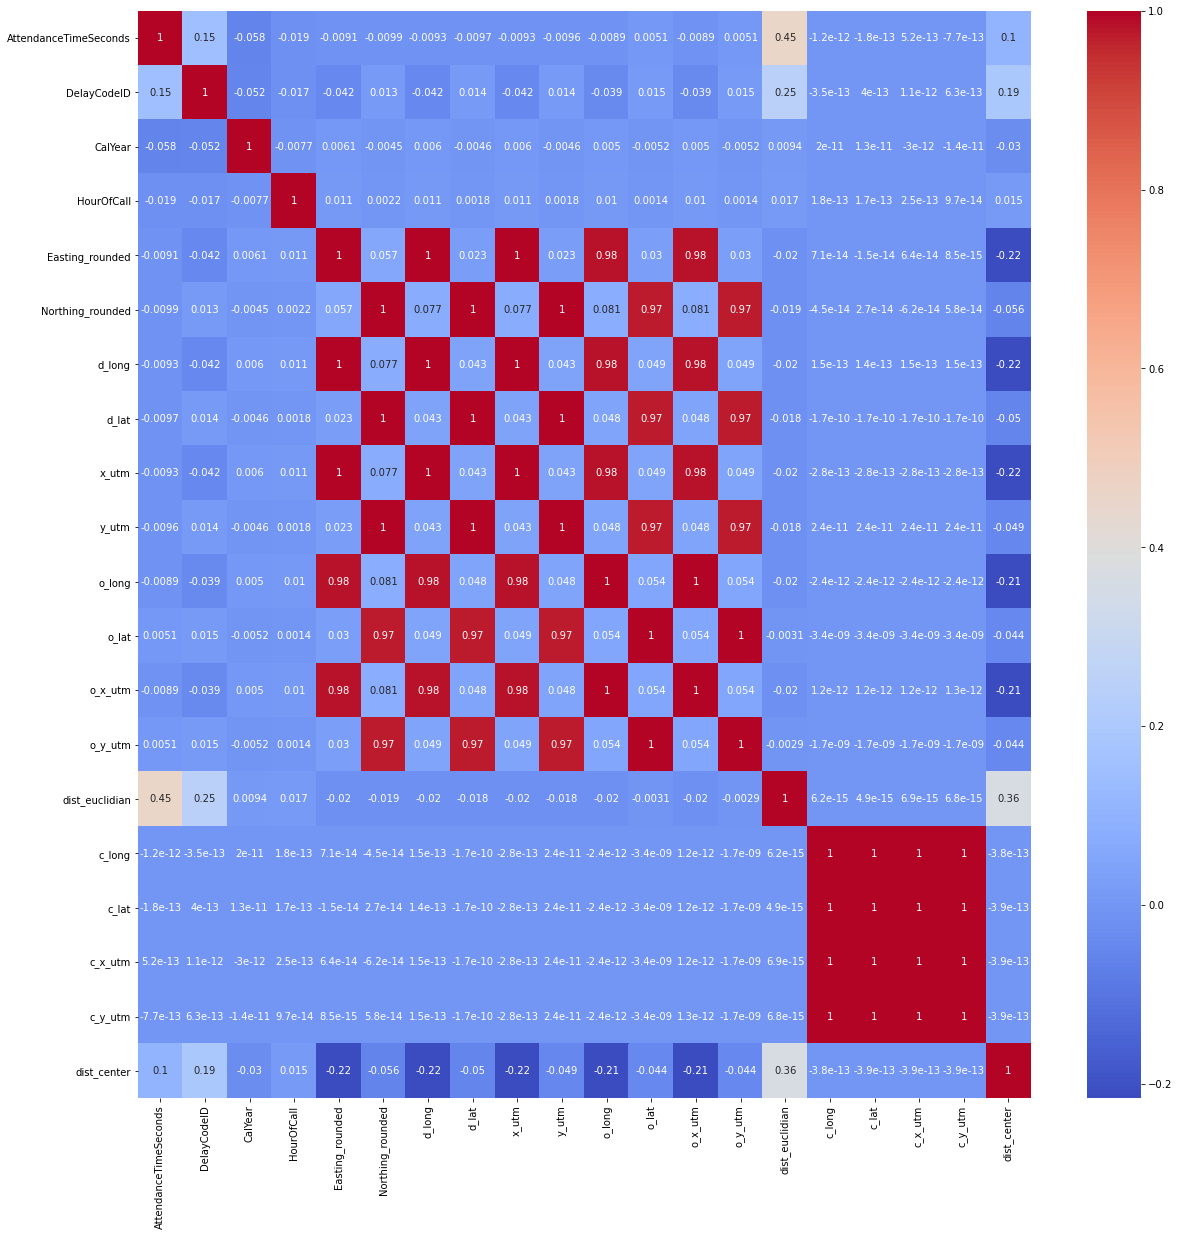

In [38]:
plt.figure(figsize = (20,20))
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

In [39]:
print(pearsonr(df['dist_euclidian'], df['dist_center']))

(0.36436000001292884, 0.0)


# D'après les matrices de corréation, la distance par rapport au centre-ville de Londres et la distance euclidienne sont positivement et faiblement corrélées (seuil entre 0.2 et 0.5): ceci s'explique probablement par le fait que les stations les plus excentrées du centre-ville sont celles qui totalisent le plus de kilomètres parcourus.

# Essayons de visualiser le nombre d'intervention par caserne:

In [40]:
#d=(df.groupby['dist_euclidian']).count().reset_index(name='counts')
d = df.groupby('DeployedFromStation_Name').count().reset_index().iloc[:, :2]

In [41]:
d.columns=['DeployedFromStation_Name','Counts']
dat = pd.DataFrame(columns=['x','y','lon','lat','DeployedFromStation_Name'])
for j, i in enumerate(df.DeployedFromStation_Name.unique()):
    sub = df[df.DeployedFromStation_Name==i].iloc[0, :]
    # pour chaque station, on récupère les coordonnées x y, lon, lat ainsi que le nom
    x, y, lon, lat, i = sub.o_x_utm, \
                        sub.o_y_utm, \
                        sub.o_long, \
                        sub.o_lat, \
                        i
                        
    dat.loc[j] = [x, y, lon, lat, i]

dat = dat.merge(d, on='DeployedFromStation_Name')
dat

,x,y,lon,lat,DeployedFromStation_Name,Counts
0,-15701.725496,6.704034e+06,-0.141051,51.465400,Clapham,18637
1,-7694.403204,6.733000e+06,-0.069120,51.627217,Edmonton,22358
2,-50283.125311,6.715810e+06,-0.451701,51.531257,Hillingdon,18755
3,-12964.379217,6.721272e+06,-0.116461,51.561766,Holloway,21338
4,-15813.267626,6.719694e+06,-0.142053,51.552957,Kentish Town,31841
...,...,...,...,...,...,...
97,-1472.311585,6.702573e+06,-0.013226,51.457223,Lewisham,15188
98,-6214.744532,6.712163e+06,-0.055828,51.510868,Shadwell,10964
99,24538.377995,6.711323e+06,0.220432,51.506171,Wennington,4002
100,3768.164763,6.676978e+06,0.033850,51.313730,Biggin Hill,2132


In [42]:
dat['ratio'] = dat.Counts/dat.Counts.max()
dat['rounded'] = dat.Counts/100
layer = pdk.Layer(
    "ColumnLayer",
    dat,
    get_position=['lon', 'lat'],
    auto_highlight=True,
    get_elevation='rounded',
    elevation_scale=20,
    pickable=True,
    extruded=True,
    radius=1500,
    get_fill_color='[220+(240-220)*(1-ratio), 20+(230-20)*(1-ratio), 60+(140-60)*(1-ratio)]',
    coverage=0.3)
view_state = pdk.ViewState(
    longitude=-0.118092,
    latitude=51.509865,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)
tooltip={
        'html': "<b>{DeployedFromStation_Name}</b> <br> nb interventions: <b>{Counts}</b>",
        'style': {
            'color': 'white',
            "z-index": 2
            }
        }
r = pdk.Deck(map_style="light",layers=[layer], initial_view_state=view_state, tooltip=tooltip)
r.to_html('interventions.html')

# Nous remarquons que les casernes les plus centrales (celles situées dans les boroughs du coeur de Londres), sont celles qui totalisent le plus d'interventions. 

# D'après les visualisations ci-dessus, nous poouvons émettre quelques hypothèses, que nous allons confirmer ou pas par des tests statistiques.

# D'abord, testons l'hypothèse selon laquelle l'heure d'intervention influe sur la distance cumulée parcourue:

In [43]:
t_bis.columns

Index(['HourOfCall', 'dist_euclidian'], dtype='object')

In [44]:
t1, t2 = t_bis.index, t_bis['dist_euclidian']
r, p = pearsonr(t1, t2)
print('r = ' ,r, 'P =', p)

r =  0.7597277046426157 P = 1.6608891946705443e-05


# Nous voyons clairement que la relation est forte (r = 0.76) et (P < 0.05). Par conséquent, la relation entre l'horaire d'intervention et la distance cumulée est statistiquement significative.

# Testons maintenant l'hypothèse selon laquelle la distance du lieu d'intervention par rapport au centre-ville de Londres, influe sur la distance parcourue par intervention:

In [45]:
c1, c2 = df['dist_euclidian'], df['dist_center']
r_bis, P_bis = pearsonr(c1, c2)
print('r = ', r_bis, 'P_bis =', P_bis)

r =  0.36436000001292884 P_bis = 0.0


# La relation est relativement faible, cependant significative car P_bis < 0.05